In [2]:
import pandas as pd
import numpy as np
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA, TruncatedSVD, NMF
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error

from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import itertools
import scipy.stats
from scipy.linalg import pinv

from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, f1_score, precision_score,recall_score
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import learning_curve, KFold

import time

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [114]:
data_df = pd.read_csv('bank-additional-full.csv', sep=';')

data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [116]:
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df = pd.read_csv('../hw1/bank-additional-full.csv', sep=';')
df['target'] = df['y'].apply(lambda x : 1 if x=='yes' else 0)
df = df.drop(['y'], axis=1)
X_cols = df.columns[:-1]

In [4]:
def data_check(df):
    data_types = df.dtypes
    nrows = df.shape[0]
    nnulls = df.isnull().sum()
    null_ratio = nnulls/nrows * 100
    skewness = df.skew()
    
    out = pd.concat([data_types, nnulls, null_ratio, skewness], axis = 1)
    out.columns = ['dtypes', 'num_nulls', 'null_ratio_pct', 'skewness']
    return out

In [5]:
data_check_out = data_check(df)
data_check_out

,dtypes,num_nulls,null_ratio_pct,skewness
age,int64,0,0.0,0.784697
job,object,0,0.0,NaN
marital,object,0,0.0,NaN
education,object,0,0.0,NaN
default,object,0,0.0,NaN
housing,object,0,0.0,NaN
loan,object,0,0.0,NaN
contact,object,0,0.0,NaN
month,object,0,0.0,NaN
day_of_week,object,0,0.0,NaN


In [6]:
# get list of numeric variables
numeric_vars = data_check_out[data_check_out['dtypes']!='object'].index
cat_vars = data_check_out[data_check_out['dtypes']=='object'].index

In [7]:
# categorical transformation
labelencoder = LabelEncoder()

for c in cat_vars:
    df[c] = labelencoder.fit_transform(df[c]) 

In [8]:
# standardization
scaler = StandardScaler(with_std = False)
df_std = pd.DataFrame(scaler.fit_transform(df[X_cols]), columns= X_cols) 
X_train, X_test, y_train, y_test = train_test_split(df_std[X_cols], df['target'], test_size=0.3, random_state=0)
X = df_std[X_cols]
y = df['target']

# Clustering

In [14]:
%%time
n_clusters_range = np.arange(1,10,1)

inertia = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X)
    inertia.append(kmeans.inertia_)


CPU times: user 13.6 s, sys: 8.94 s, total: 22.6 s
Wall time: 3.41 s


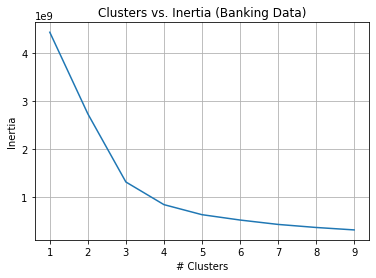

In [17]:
plt.plot(n_clusters_range, inertia)
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia (Banking Data)')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6327709925072076
For n_clusters = 3 The average silhouette_score is : 0.6875734692212077


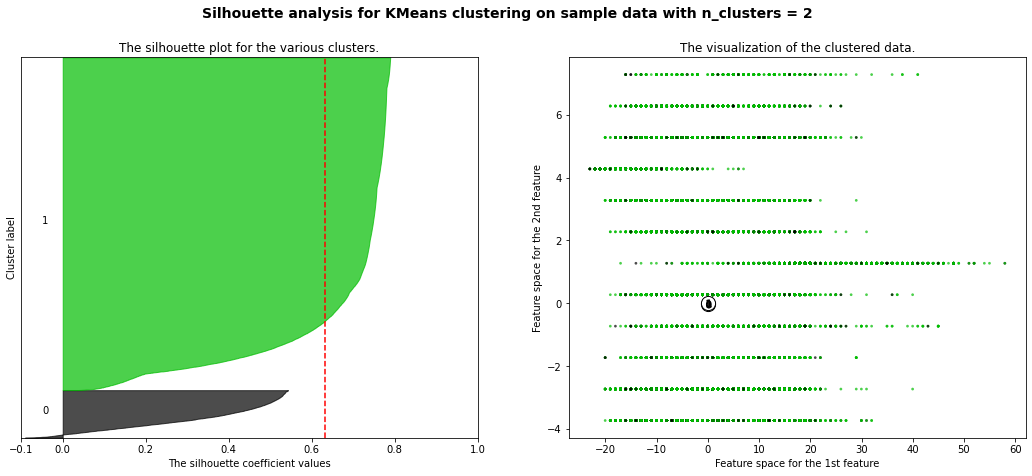

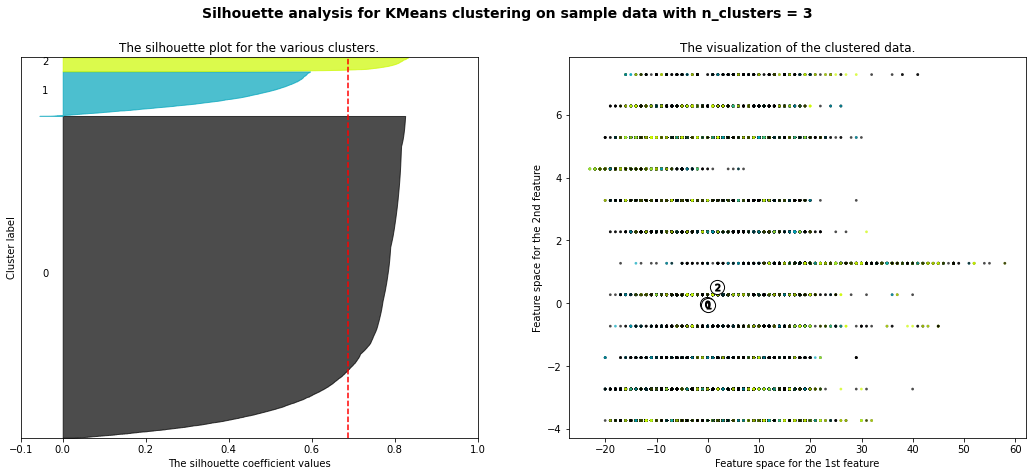

In [109]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = np.arange(2, 4, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
# plt.savefig('banking_kmeans_silhouette.png')
plt.show()

In [19]:
start = time.time()
k = 3
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)
end = time.time()
print('Inertia: ', kmeans.inertia_)
silhouette_score_value = silhouette_score(X, kmeans.labels_)
print('Silhouette score: ', silhouette_score_value)
print("Wall time (s): ", end - start)

Inertia:  1321908573.890947
Silhouette score:  0.6875734692212077
Wall time (s):  0.19022917747497559


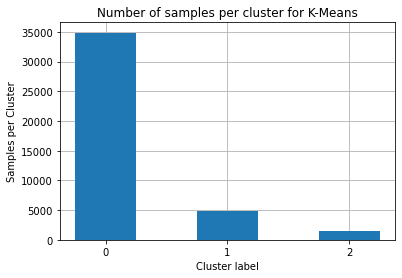

In [20]:
plt.hist(kmeans.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Samples per Cluster')
plt.title('Number of samples per cluster for K-Means')
plt.grid()

## EM

In [21]:
%%time
min_sc = -np.inf
num_components_range = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
metric_dict = {}
for c in covariances:
    print(c)
    start = time.time()
    score_list = []
    for n in num_components_range:
        gmm = mixture.GaussianMixture(n_components=n, covariance_type=c).fit(X)
        gmm_labels = gmm.predict(X)
        try:
            sc = silhouette_score(X, gmm_labels)
        except:
            sc = None
        score_list.append(sc)
        if sc != None and sc > min_sc:
            best_gmm = mixture.GaussianMixture(n_components=n, covariance_type=c)
    print('Wall time: ', time.time()-start)
    metric_dict[c] = score_list

spherical
Wall time:  271.80141162872314
tied
Wall time:  9209.481523990631
diag
Wall time:  2708.9156081676483
full
Wall time:  313.7988338470459
CPU times: user 29min 9s, sys: 39min 45s, total: 1h 8min 54s
Wall time: 3h 28min 23s


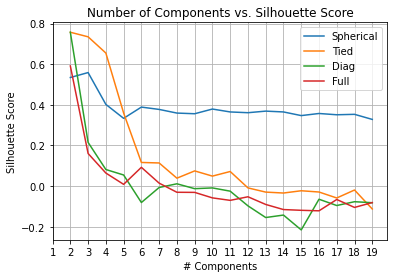

In [22]:
plt.plot(num_components_range, metric_dict['spherical'], label = 'Spherical')
plt.plot(num_components_range, metric_dict['tied'], label = 'Tied')
plt.plot(num_components_range, metric_dict['diag'], label = 'Diag')
plt.plot(num_components_range, metric_dict['full'], label = 'Full')
plt.xticks(num_components_range)
plt.title("Number of Components vs. Silhouette Score")
plt.xlabel("# Components")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

In [54]:
start = time.time()
n_components = 2
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='diag').fit(X)
gmm_labels = gmm.predict(X)
sc = silhouette_score(X, gmm_labels)
print("Wall time: ", time.time() - start)
print("Silhouette: ", sc)

Wall time:  15.797574996948242
Silhouette:  0.7574699662320143


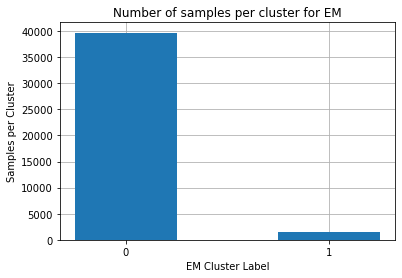

In [58]:
plt.hist(gmm_labels, bins=np.arange(0,  n_components+ 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('EM Cluster Label')
plt.ylabel('Samples per Cluster')
plt.title('Number of samples per cluster for EM')
plt.grid()

# Dimensionality Reduction

## PCA

In [59]:
pca = PCA()
pca.fit(X)

PCA()

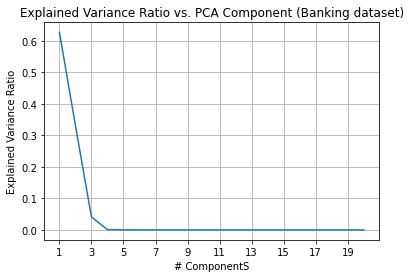

In [60]:
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('# ComponentS')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. PCA Component (Banking dataset)')
plt.grid()
plt.show()

In [61]:
# X_PCA_3D = PCA(n_components = 3).fit_transform(X)
# fig = plt.figure()
# ax = Axes3D(fig)
# for i in range(len(y)):
#     if y[i] == 0:
#         ax.scatter(X_PCA_3D[i, :][0], X_PCA_3D[i, :][1], X_PCA_3D[i, :][2], c = 'g', marker='o', label='0')
#     elif y[i] == 1:
#         ax.scatter(X_PCA_3D[i, :][0], X_PCA_3D[i, :][1], X_PCA_3D[i, :][2], c = 'r', marker='o', label='1')
# ax.set_xlabel('PCA 1st Component')
# ax.set_ylabel('PCA 2nd Component')
# ax.set_zlabel('PCA 3rd Component')
# plt.title('Banking Dataset Reduced to 3D (PCA)')
# plt.show()

In [79]:
start = time.time()
X_PCA = PCA(n_components = 4).fit_transform(X)
print(time.time()-start)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=0)

0.09046697616577148


In [78]:
X_PCA_train.shape

(28831, 4)

## ICA

In [64]:
# kurtosis_values = []
# for i in range(1,30):
#     X_ICA = FastICA(n_components = i).fit_transform(X)
#     kur = scipy.stats.kurtosis(X_ICA)
#     kurtosis_values.append(np.mean(kur)/i)
# kurtosis_values = np.array(kurtosis_values)
# plt.plot(np.arange(1,30),kurtosis_values)
# plt.xlabel('Components')
# plt.ylabel('Normalized Mean Kurtosis Value')
# plt.grid()
# plt.title('Normalized Mean Kurtosis Value vs. Components (Banking)')
# # plt.savefig('bc_ica_kurtosis.png')
# plt.show()

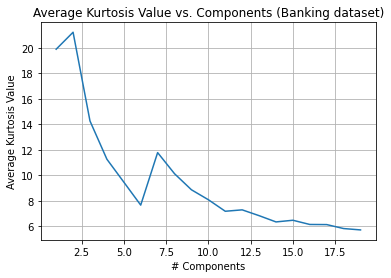

In [65]:
kurtosis_list = []
component_range = np.arange(1,20)
for i in component_range:
    X_ICA = FastICA(n_components = i, random_state=123).fit_transform(X)
    kurtosis = scipy.stats.kurtosis(X_ICA)
    kurtosis_list.append(np.mean(kurtosis))

plt.plot(component_range, kurtosis_list)
plt.grid()
plt.xlabel('# Components')
plt.ylabel('Average Kurtosis Value')
plt.title('Average Kurtosis Value vs. Components (Banking dataset)')
# plt.savefig('wine_ica_kurtosis.png')
plt.show()

In [80]:
best_n = np.argmax(kurtosis_list) + 1
print(best_n)
start=time.time()
X_ICA = FastICA(n_components = best_n, random_state=123).fit_transform(X)
print(time.time()-start)

2
0.0663292407989502


In [67]:
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=0)

In [77]:
X_ICA_train.shape

(28831, 2)

# Randomized Projection

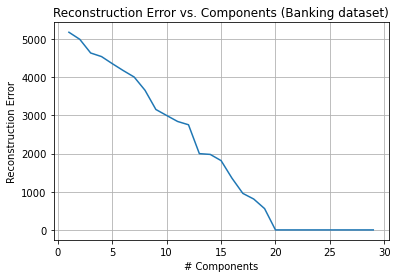

In [68]:
def calc_reconstruction_error(rp, X):
    
    c = rp.components_
    p = pinv(c)
    reconstructed = ((p@c)@(X.T)).T
    mse = mean_squared_error(X, reconstructed)   
    return np.mean(mse)
#     reconstruction_variance.append(np.std(mean_mse))
#     reconstruction_error.append(np.mean(mean_mse))

reconstruction_error_list = []
component_range = np.arange(1,30)
for i in component_range:
    rp = GaussianRandomProjection(n_components=i, random_state=123).fit(X)
    rr = calc_reconstruction_error(rp, X)
    reconstruction_error_list.append(rr)

plt.plot(component_range, reconstruction_error_list)
plt.grid()
plt.xlabel('# Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Components (Banking dataset)')
# plt.savefig('wine_rp_reconstruction_error.png')
plt.show()

In [81]:
best_n_comp = np.argmin(reconstruction_error_list) + 1
print(best_n_comp)
best_n_comp=20
print(best_n_comp)
start = time.time()
X_RP = GaussianRandomProjection(n_components = best_n_comp).fit_transform(X)
print(time.time()-start)

24
20
0.016044139862060547


In [75]:
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, y, test_size=0.3, random_state=0)

In [76]:
X_RP_train.shape

(28831, 20)

## Feature Selection using Tree

In [82]:
start=time.time()
selector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(X, y)
X_tree = selector.transform(X)
print(time.time()-start)
print(X_tree.shape)

3.5884311199188232
(41188, 3)


In [41]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y, test_size=0.3, random_state=0)

In [71]:
X.shape

(41188, 20)

# Clustering with Dimensionality Reduction

In [83]:
kmeans_labels = {}

## PCA + K-means

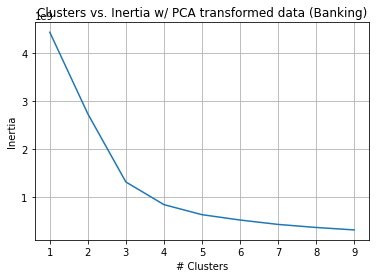

3
CPU times: user 2min 30s, sys: 3min 14s, total: 5min 45s
Wall time: 1min 58s


In [84]:
%%time
n_clusters_range = np.arange(1,10,1)

inertia = []
sc = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X_PCA)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_PCA)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    try:
        silhouette_avg = silhouette_score(X_PCA, cluster_labels)
    except:
        silhouette_avg = -np.inf
    sc.append(silhouette_avg)

plt.plot(n_clusters_range, inertia)
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia w/ PCA transformed data (Banking)')
# plt.savefig('wine_pca_kmeans_elbow_plot.png')
plt.show()
print(np.argmax(sc)+1)

In [85]:
start = time.time()
k = np.argmax(sc)+1
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X_PCA)
end = time.time()
print('Inertia: ', kmeans.inertia_)
kmeans_labels['PCA'] = kmeans.labels_
silhouette_score_value = silhouette_score(X_PCA, kmeans.labels_)
print('Silhouette score: ', silhouette_score_value)
print("Wall time (s): ", end - start)

Inertia:  1319624128.209527
Silhouette score:  0.6888288788919944
Wall time (s):  0.1420891284942627


In [47]:
# df = pd.DataFrame(X_PCA.copy())
# colors = ['#DF2020', '#81DF20', '#2095DF']
# df['cluster'] = kmeans.predict(X_PCA)
# df['c'] = df.cluster.map({0:colors[0], 1:colors[1]})
# fig = plt.figure(figsize=(26,6))
# ax = fig.add_subplot(131, projection='3d')
# ax.scatter(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=df.c, s=15)
# ax.set_xlabel('PCA_Component_1')
# ax.set_ylabel('PCA_Component_2')
# ax.set_zlabel('PCA_Component_3')
# plt.show()

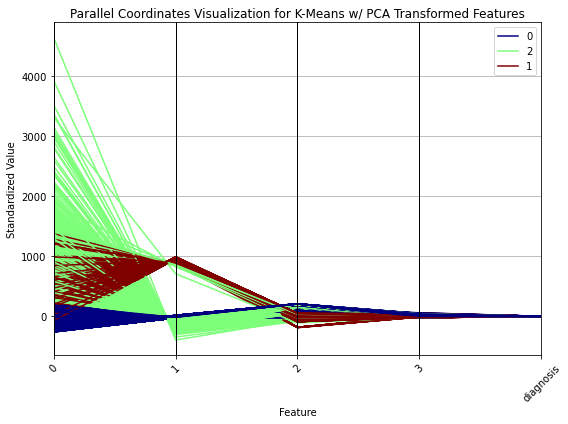

In [86]:
#https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
np.random.seed(123)
data_viz = pd.DataFrame(X_PCA.copy())
data_viz['diagnosis'] = y
data_viz['cluster_label'] = kmeans.labels_

idx_viz = np.arange(0, data_viz.shape[1])#np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Standardized Value')
plt.title('Parallel Coordinates Visualization for K-Means w/ PCA Transformed Features (Banking)')
plt.tight_layout()
# plt.savefig('bc_parallel_coordinates_trees.png')

## ICA + K-means

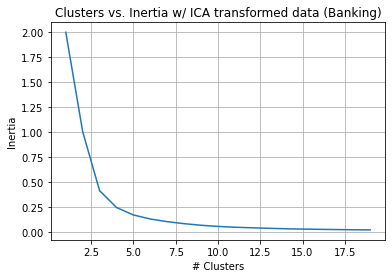

2
CPU times: user 5min 19s, sys: 7min 52s, total: 13min 11s
Wall time: 3min 59s


In [87]:
%%time
n_clusters_range = np.arange(1,20,1)

inertia = []
sc = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X_ICA)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_ICA)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    try:
        silhouette_avg = silhouette_score(X_ICA, cluster_labels)
    except:
        silhouette_avg = -np.inf
    sc.append(silhouette_avg)

plt.plot(n_clusters_range, inertia)
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia w/ ICA transformed data (Banking)')
# plt.savefig('wine_ica_kmeans_elbow_plot.png')
plt.show()
print(np.argmax(sc)+1)

In [88]:
start = time.time()
k = np.argmax(sc)+1
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X_ICA)
end = time.time()
print('Inertia: ', kmeans.inertia_)
kmeans_labels['ICA'] = kmeans.labels_
silhouette_score_value = silhouette_score(X_ICA, kmeans.labels_)
print('Silhouette score: ', silhouette_score_value)
print("Wall time (s): ", end - start)

Inertia:  1.0033075051237255
Silhouette score:  0.8360811023138432
Wall time (s):  0.062030792236328125


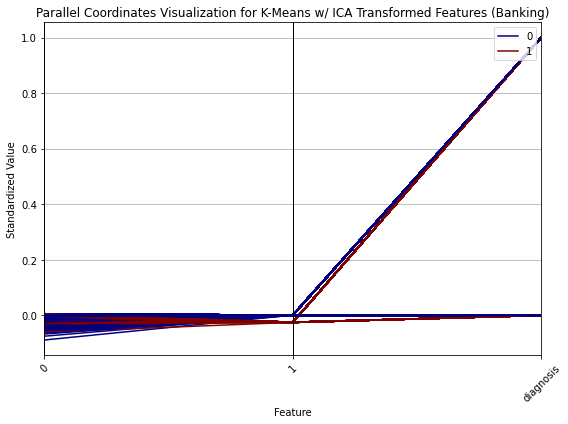

In [89]:
#https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
np.random.seed(123)
data_viz = pd.DataFrame(X_ICA.copy())
data_viz['diagnosis'] = y
data_viz['cluster_label'] = kmeans.labels_

idx_viz = np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Standardized Value')
plt.title('Parallel Coordinates Visualization for K-Means w/ ICA Transformed Features (Banking)')
plt.tight_layout()
# plt.savefig('bc_parallel_coordinates_trees.png')

## RP + K-means

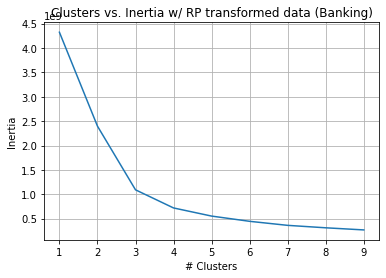

2
CPU times: user 2min 50s, sys: 3min 16s, total: 6min 6s
Wall time: 2min 3s


In [90]:
%%time
n_clusters_range = np.arange(1,10,1)

inertia = []
sc = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X_RP)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_RP)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    try:
        silhouette_avg = silhouette_score(X_RP, cluster_labels)
    except:
        silhouette_avg = -np.inf
    sc.append(silhouette_avg)

plt.plot(n_clusters_range, inertia)
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia w/ RP transformed data (Banking)')
# plt.savefig('wine_rp_kmeans_elbow_plot.png')
plt.show()
print(np.argmax(sc)+1)

In [91]:
start = time.time()
k = np.argmax(sc)+1
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X_RP)
end = time.time()
kmeans_labels['RP'] = kmeans.labels_
print('Inertia: ', kmeans.inertia_)
silhouette_score_value = silhouette_score(X_RP, kmeans.labels_)
print('Silhouette score: ', silhouette_score_value)
print("Wall time (s): ", end - start)

Inertia:  2397130477.1940317
Silhouette score:  0.8041717331755136
Wall time (s):  0.1169278621673584


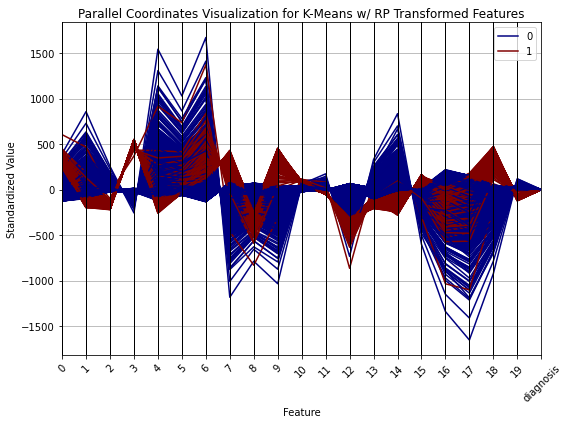

In [92]:
#https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
np.random.seed(123)
data_viz = pd.DataFrame(X_RP.copy())
data_viz['diagnosis'] = y
data_viz['cluster_label'] = kmeans.labels_

idx_viz = np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Standardized Value')
plt.title('Parallel Coordinates Visualization for K-Means w/ RP Transformed Features')
plt.tight_layout()
# plt.savefig('bc_parallel_coordinates_trees.png')

## Tree + K-means

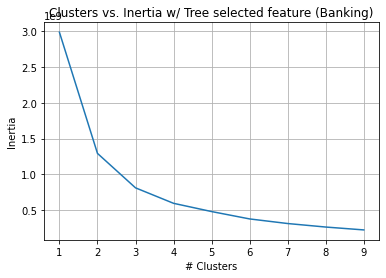

2
CPU times: user 2min 29s, sys: 3min 3s, total: 5min 33s
Wall time: 1min 59s


In [93]:
%%time
n_clusters_range = np.arange(1,10,1)

inertia = []
sc = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters = i, random_state=123).fit(X_tree)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_tree)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    try:
        silhouette_avg = silhouette_score(X_tree, cluster_labels)
    except:
        silhouette_avg = -np.inf
    sc.append(silhouette_avg)

plt.plot(n_clusters_range, inertia)
plt.grid()
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia w/ Tree selected feature (Banking)')
plt.savefig('wine_tree_kmeans_elbow_plot.png')
plt.show()
print(np.argmax(sc)+1)

In [119]:
start = time.time()
k = np.argmax(sc)+1
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_tree)
end = time.time()
kmeans_labels['Tree'] = kmeans.labels_
print('Inertia: ', kmeans.inertia_)
silhouette_score_value = silhouette_score(X_tree, kmeans.labels_)
print('Silhouette score: ', silhouette_score_value)
print("Wall time (s): ", end - start)

Inertia:  1292219509.6878595
Silhouette score:  0.6789687172438467
Wall time (s):  0.1176140308380127


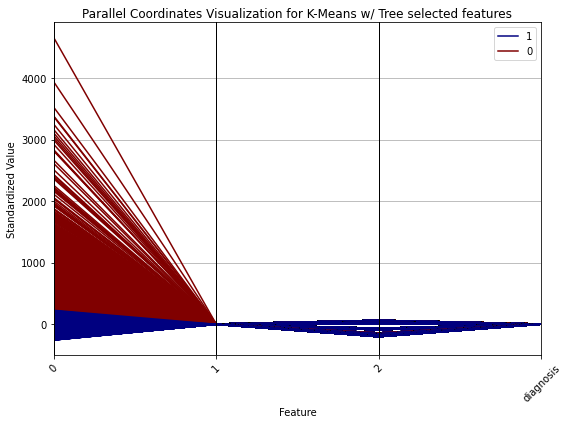

In [95]:
#https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
np.random.seed(123)
data_viz = pd.DataFrame(X_tree.copy())
data_viz['diagnosis'] = y
data_viz['cluster_label'] = kmeans.labels_

idx_viz = np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Standardized Value')
plt.title('Parallel Coordinates Visualization for K-Means w/ Tree selected features')
plt.tight_layout()
# plt.savefig('bc_parallel_coordinates_trees.png')

## PCA + EM

In [96]:
em_labels = {}

spherical
Wall time:  256.6648588180542
tied
Wall time:  282.34966802597046
diag
Wall time:  258.28732895851135
full
Wall time:  307.1115047931671


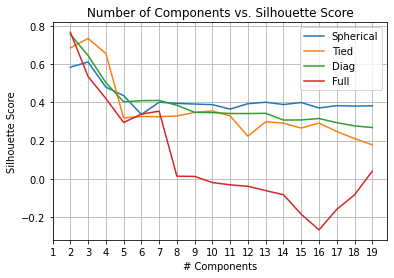

CPU times: user 23min 57s, sys: 34min 14s, total: 58min 11s
Wall time: 18min 24s


In [97]:
%%time
min_sc = -np.inf
num_components_range = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
metric_dict = {}
for c in covariances:
    print(c)
    start = time.time()
    score_list = []
    for n in num_components_range:
        gmm = mixture.GaussianMixture(n_components=n, covariance_type=c).fit(X_PCA)
        gmm_labels = gmm.predict(X_PCA)
        try:
            sc = silhouette_score(X_PCA, gmm_labels)
        except:
            sc = None
        score_list.append(sc)
        if sc != None and sc > min_sc:
            best_gmm = mixture.GaussianMixture(n_components=n, covariance_type=c)
    print('Wall time: ', time.time()-start)
    metric_dict[c] = score_list

plt.plot(num_components_range, metric_dict['spherical'], label = 'Spherical')
plt.plot(num_components_range, metric_dict['tied'], label = 'Tied')
plt.plot(num_components_range, metric_dict['diag'], label = 'Diag')
plt.plot(num_components_range, metric_dict['full'], label = 'Full')
plt.grid()
plt.xticks(num_components_range)
plt.title("Number of Components vs. Silhouette Score")
plt.xlabel("# Components")
plt.ylabel("Silhouette Score")
plt.legend()
plt.savefig('wine_gmm_silhouette_score_pca.png')
plt.show()

In [98]:
start = time.time()
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X_PCA)
gmm_labels = gmm.predict(X_PCA)
print(time.time()-start)
em_labels['PCA'] = gmm_labels
sc = silhouette_score(X_PCA, gmm_labels)
print("Silhouette Score: ", sc)

0.14618611335754395
Silhouette Score:  0.7685522213664223


In [99]:
# #https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
# np.random.seed(123)
# data_viz = pd.DataFrame(X_PCA.copy())
# data_viz['diagnosis'] = y
# data_viz['cluster_label'] = gmm_labels

# idx_viz = np.arange(0, data_viz.shape[1])#np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

# plt.figure(figsize=(8, 6))
# pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
# plt.xticks(rotation=45)
# plt.xlabel('Feature')
# plt.ylabel('Standardized Value')
# plt.title('Parallel Coordinates Visualization for EM w/ PCA Transformed Features')
# plt.tight_layout()
# # plt.savefig('bc_parallel_coordinates_trees.png')

## ICA + EM

spherical
Wall time:  261.64684295654297
tied
Wall time:  271.68787384033203
diag
Wall time:  252.34712672233582
full
Wall time:  253.9751491546631


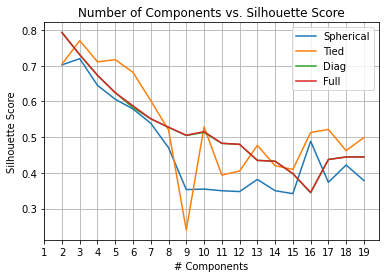

CPU times: user 22min 30s, sys: 32min 59s, total: 55min 29s
Wall time: 17min 19s


In [100]:
%%time
min_sc = -np.inf
num_components_range = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
metric_dict = {}
for c in covariances:
    print(c)
    start = time.time()
    score_list = []
    for n in num_components_range:
        gmm = mixture.GaussianMixture(n_components=n, covariance_type=c, random_state=123).fit(X_ICA)
        gmm_labels = gmm.predict(X_ICA)
        try:
            sc = silhouette_score(X_ICA, gmm_labels)
        except:
            sc = None
        score_list.append(sc)
        if sc != None and sc > min_sc:
            best_gmm = mixture.GaussianMixture(n_components=n, covariance_type=c)
    print('Wall time: ', time.time()-start)
    metric_dict[c] = score_list

plt.plot(num_components_range, metric_dict['spherical'], label = 'Spherical')
plt.plot(num_components_range, metric_dict['tied'], label = 'Tied')
plt.plot(num_components_range, metric_dict['diag'], label = 'Diag')
plt.plot(num_components_range, metric_dict['full'], label = 'Full')
plt.grid()
plt.xticks(num_components_range)
plt.title("Number of Components vs. Silhouette Score")
plt.xlabel("# Components")
plt.ylabel("Silhouette Score")
plt.legend()
plt.savefig('wine_gmm_silhouette_score_pca.png')
plt.show()

In [108]:
start=time.time()
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=123).fit(X_ICA)
gmm_labels = gmm.predict(X_ICA)
print("Wall time: ", time.time()-start)
em_labels['ICA'] = gmm_labels
sc = silhouette_score(X_ICA, gmm_labels)
print("Silhouette Score: ", sc)

Wall time:  0.09076786041259766
Silhouette Score:  0.7922341048494772


In [102]:
# #https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
# np.random.seed(123)
# data_viz = pd.DataFrame(X_ICA.copy())
# data_viz['diagnosis'] = y
# data_viz['cluster_label'] = gmm_labels

# idx_viz = np.arange(0, data_viz.shape[1])#np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

# plt.figure(figsize=(8, 6))
# pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
# plt.xticks(rotation=45)
# plt.xlabel('Feature')
# plt.ylabel('Standardized Value')
# plt.title('Parallel Coordinates Visualization for EM w/ ICA Transformed Features')
# plt.tight_layout()
# # plt.savefig('bc_parallel_coordinates_trees.png')

## RP + EM

spherical
Wall time:  270.2801158428192
tied
Wall time:  303.7534668445587
diag
Wall time:  270.09875893592834
full
Wall time:  314.673926115036


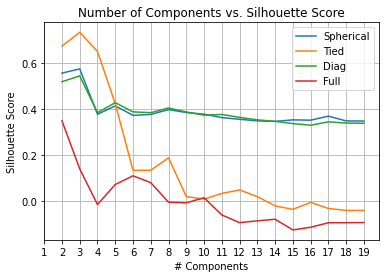

CPU times: user 29min 20s, sys: 40min 36s, total: 1h 9min 56s
Wall time: 19min 18s


In [103]:
%%time
min_sc = -np.inf
num_components_range = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
metric_dict = {}
for c in covariances:
    print(c)
    start = time.time()
    score_list = []
    for n in num_components_range:
        gmm = mixture.GaussianMixture(n_components=n, covariance_type=c, random_state=123).fit(X_RP)
        gmm_labels = gmm.predict(X_RP)
        try:
            sc = silhouette_score(X_RP, gmm_labels)
        except:
            sc = None
        score_list.append(sc)
        if sc != None and sc > min_sc:
            best_gmm = mixture.GaussianMixture(n_components=n, covariance_type=c)
    print('Wall time: ', time.time()-start)
    metric_dict[c] = score_list

plt.plot(num_components_range, metric_dict['spherical'], label = 'Spherical')
plt.plot(num_components_range, metric_dict['tied'], label = 'Tied')
plt.plot(num_components_range, metric_dict['diag'], label = 'Diag')
plt.plot(num_components_range, metric_dict['full'], label = 'Full')
plt.grid()
plt.xticks(num_components_range)
plt.title("Number of Components vs. Silhouette Score")
plt.xlabel("# Components")
plt.ylabel("Silhouette Score")
plt.legend()
# plt.savefig('wine_gmm_silhouette_score_pca.png')
plt.show()

In [105]:
start=time.time()
gmm = mixture.GaussianMixture(n_components=2, covariance_type='tied', random_state=123).fit(X_RP)
gmm_labels = gmm.predict(X_RP)
print('Wall time: ', time.time()-start)
em_labels['RP'] = gmm_labels
sc = silhouette_score(X_RP, gmm_labels)
print("Silhouette Score: ", sc)

Wall time:  0.14094209671020508
Silhouette Score:  0.6724971380857975


In [106]:
# #https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
# np.random.seed(123)
# data_viz = pd.DataFrame(X_RP.copy())
# data_viz['diagnosis'] = y
# data_viz['cluster_label'] = gmm_labels

# idx_viz = np.arange(0, data_viz.shape[1])#np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

# plt.figure(figsize=(8, 6))
# pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
# plt.xticks(rotation=45)
# plt.xlabel('Feature')
# plt.ylabel('Standardized Value')
# plt.title('Parallel Coordinates Visualization for EM w/ RP Transformed Features')
# plt.tight_layout()
# # plt.savefig('bc_parallel_coordinates_trees.png')

## Tree + EM

spherical
Wall time:  255.7181420326233
tied
Wall time:  289.055871963501
diag
Wall time:  281.0304470062256
full
Wall time:  289.6342921257019


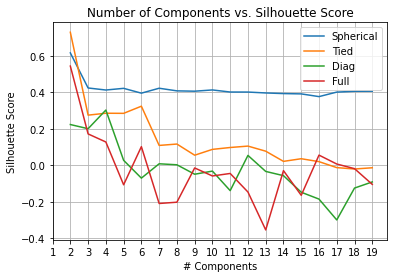

CPU times: user 24min 56s, sys: 36min 14s, total: 1h 1min 11s
Wall time: 18min 35s


In [107]:
%%time
min_sc = -np.inf
num_components_range = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
metric_dict = {}
for c in covariances:
    print(c)
    start = time.time()
    score_list = []
    for n in num_components_range:
        gmm = mixture.GaussianMixture(n_components=n, covariance_type=c, random_state=123).fit(X_tree)
        gmm_labels = gmm.predict(X_tree)
        try:
            sc = silhouette_score(X_tree, gmm_labels)
        except:
            sc = None
        score_list.append(sc)
        if sc != None and sc > min_sc:
            best_gmm = mixture.GaussianMixture(n_components=n, covariance_type=c)
    print('Wall time: ', time.time()-start)
    metric_dict[c] = score_list

plt.plot(num_components_range, metric_dict['spherical'], label = 'Spherical')
plt.plot(num_components_range, metric_dict['tied'], label = 'Tied')
plt.plot(num_components_range, metric_dict['diag'], label = 'Diag')
plt.plot(num_components_range, metric_dict['full'], label = 'Full')
plt.grid()
plt.xticks(num_components_range)
plt.title("Number of Components vs. Silhouette Score")
plt.xlabel("# Components")
plt.ylabel("Silhouette Score")
plt.legend()
plt.savefig('wine_gmm_silhouette_score_tree.png')
plt.show()

In [117]:
start = time.time()
gmm = mixture.GaussianMixture(n_components=2, covariance_type='tied', random_state=123).fit(X_tree)
gmm_labels = gmm.predict(X_tree)
print(time.time()-start)
em_labels['Tree'] = gmm_labels
sc = silhouette_score(X_tree, gmm_labels)
print("Silhouette Score: ", sc)

0.09931707382202148
Silhouette Score:  0.7286612518069003


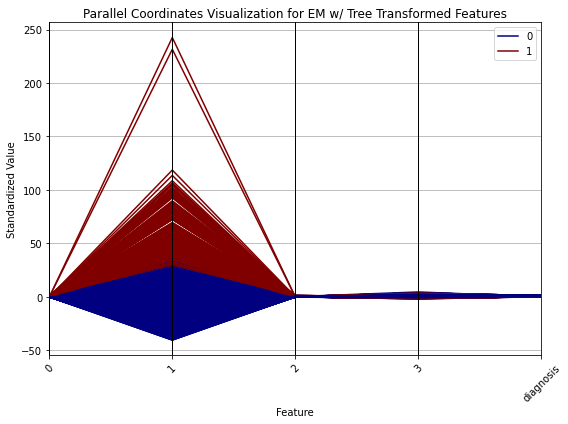

In [201]:
# #https://link.springer.com/chapter/10.1007/978-3-642-30217-6_42
# np.random.seed(123)
# data_viz = pd.DataFrame(X_tree.copy())
# data_viz['diagnosis'] = y
# data_viz['cluster_label'] = gmm_labels

# idx_viz = np.arange(0, data_viz.shape[1])#np.append(np.arange(0, data_viz.shape[1] - 2), [data_viz.shape[1] - 2, data_viz.shape[1] - 1]) 

# plt.figure(figsize=(8, 6))
# pd.plotting.parallel_coordinates(data_viz.iloc[:, idx_viz], 'cluster_label', colormap='jet')
# plt.xticks(rotation=45)
# plt.xlabel('Feature')
# plt.ylabel('Standardized Value')
# plt.title('Parallel Coordinates Visualization for EM w/ Tree Transformed Features')
# plt.tight_layout()
# # plt.savefig('bc_parallel_coordinates_trees.png')

# Clustering Viz

In [140]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)

(1593, 3)

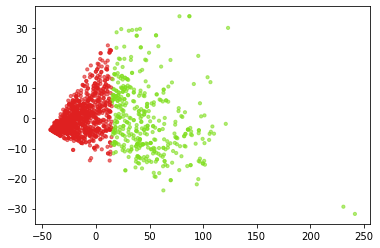

In [151]:
df = X.copy()
df['cluster'] = kmeans.fit_predict(X)
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

X_PCA_viz = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_PCA_viz[:,0], X_PCA_viz[:,1], c=df.c, alpha = 0.6, s=10)

# NN with Dimensionality Reduction

In [235]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
#     fig = plt.figure()
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )

#     permutation = np.random.permutation(len(X))
#     X = X.iloc[permutation]
#     y = y.iloc[permutation]
    
    # plotting learning curve
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    
    plt.fill_between(
            train_sizes,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
            color="g",
        )
    plt.plot(
            train_sizes, train_scores_mean, "o-", color="r", label="Training score"
        )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    
    plt.grid()
    
    return plt
    

In [206]:
def get_metrics(y_true, y_pred):
    metrics = {}
    print('Accuracy:  {:2.2%} '.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:2.2%} '.format(precision_score(y_true, y_pred)))
    print('Recall:    {:2.2%} '.format(recall_score(y_true, y_pred)))
    print('F1 Score:  {:2.2%} '.format(f1_score(y_true, y_pred)))
    print('AUC Score: {:2.2%} '.format(roc_auc_score(y_true, y_pred)))
    
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1 Score'] = f1_score(y_true, y_pred)
    metrics['AUC Score'] = roc_auc_score(y_true, y_pred)
    
    return metrics

## PCA

In [229]:
mlp = MLPClassifier(random_state=0, learning_rate_init=0.001, hidden_layer_sizes=120, 
                    validation_fraction=0.2)
print(np.mean(cross_val_score(mlp, X_PCA_train, y_PCA_train, cv=5)))


0.6565022421524664


In [230]:
results={}

In [236]:
mlp.fit(X_PCA_train, y_PCA_train)
y_PCA_pred = mlp.predict(X_PCA_test)
metrics = get_metrics(y_PCA_test, y_PCA_pred)
results['PCA'] = metrics

Accuracy:  59.62% 
Precision: 58.96% 
Recall:    72.98% 
F1 Score:  65.23% 
AUC Score: 59.10% 


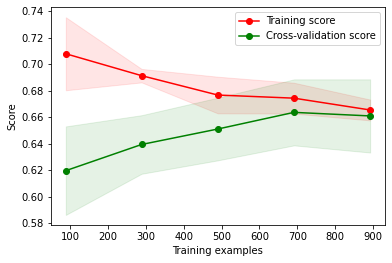

In [239]:
title = 'Learning Curve NN w/ PCA'
plot = plot_learning_curve(
    mlp,
    title,
    X_PCA_train,
    y_PCA_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
# plt.title('Learning Curve')
plot.show()

Text(0.5, 1.0, 'Loss Curve NN w/ PCA')

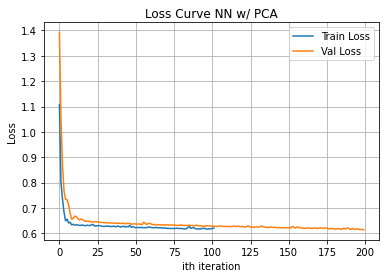

In [245]:
mlp.fit(X_PCA_train, y_PCA_train)
plt.plot(mlp.loss_curve_, label='Train Loss')
mlp.fit(X_PCA_test, y_PCA_test)
plt.plot(mlp.loss_curve_, label='Val Loss')
plt.legend()
plt.grid()
plt.xlabel('ith iteration')
plt.ylabel('Loss')
plt.title('Loss Curve NN w/ PCA')

## ICA

In [247]:
mlp.fit(X_ICA_train, y_ICA_train)
y_ICA_pred = mlp.predict(X_ICA_test)
metrics = get_metrics(y_ICA_test, y_ICA_pred)
results['ICA'] = metrics

Accuracy:  73.64% 
Precision: 72.76% 
Recall:    78.63% 
F1 Score:  75.58% 
AUC Score: 73.44% 


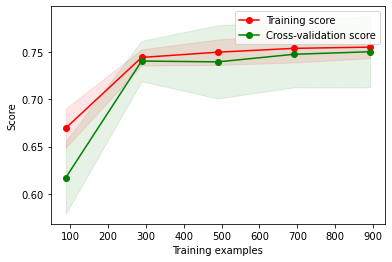

In [248]:
title = 'Learning Curve NN w/ ICA'
plot = plot_learning_curve(
    mlp,
    title,
    X_ICA_train,
    y_ICA_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
# plt.title('Learning Curve')
plot.show()

Text(0.5, 1.0, 'Loss Curve NN w/ ICA')

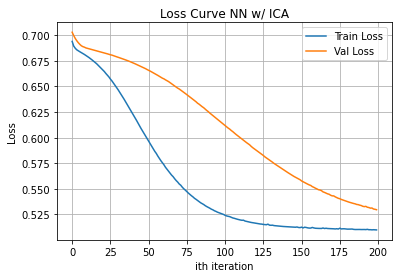

In [249]:
mlp.fit(X_ICA_train, y_ICA_train)
plt.plot(mlp.loss_curve_, label='Train Loss')
mlp.fit(X_ICA_test, y_ICA_test)
plt.plot(mlp.loss_curve_, label='Val Loss')
plt.legend()
plt.grid()
plt.xlabel('ith iteration')
plt.ylabel('Loss')
plt.title('Loss Curve NN w/ ICA')

## RP

In [253]:
mlp.fit(X_RP_train, y_RP_train)
y_RP_pred = mlp.predict(X_RP_test)
metrics = get_metrics(y_RP_test, y_RP_pred)
results['RP'] = metrics

Accuracy:  69.46% 
Precision: 68.61% 
Recall:    75.81% 
F1 Score:  72.03% 
AUC Score: 69.21% 


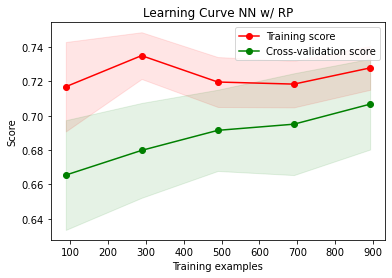

In [254]:
title = 'Learning Curve NN w/ RP'
plot = plot_learning_curve(
    mlp,
    title,
    X_RP_train,
    y_RP_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

Text(0.5, 1.0, 'Loss Curve NN w/ RP')

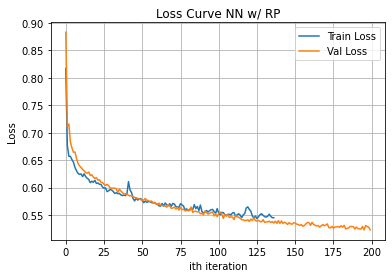

In [255]:
mlp.fit(X_RP_train, y_RP_train)
plt.plot(mlp.loss_curve_, label='Train Loss')
mlp.fit(X_RP_test, y_RP_test)
plt.plot(mlp.loss_curve_, label='Val Loss')
plt.legend()
plt.grid()
plt.xlabel('ith iteration')
plt.ylabel('Loss')
plt.title('Loss Curve NN w/ RP')

## Tree

In [234]:
mlp.fit(X_tree_train, y_tree_train)
y_tree_pred = mlp.predict(X_tree_test)
metrics = get_metrics(y_tree_test, y_tree_pred)
results['Tree'] = metrics

Accuracy:  73.64% 
Precision: 74.21% 
Recall:    75.40% 
F1 Score:  74.80% 
AUC Score: 73.57% 


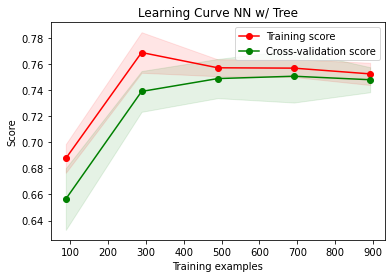

In [256]:
title = 'Learning Curve NN w/ Tree'
plot = plot_learning_curve(
    mlp,
    title,
    X_tree_train,
    y_tree_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

Text(0.5, 1.0, 'Loss Curve NN w/ Tree')

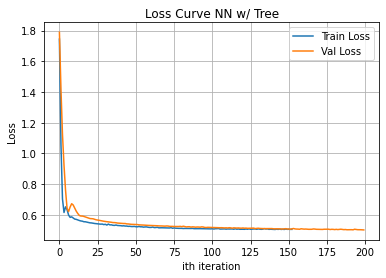

In [257]:
mlp.fit(X_tree_train, y_tree_train)
plt.plot(mlp.loss_curve_, label='Train Loss')
mlp.fit(X_tree_test, y_tree_test)
plt.plot(mlp.loss_curve_, label='Val Loss')
plt.legend()
plt.grid()
plt.xlabel('ith iteration')
plt.ylabel('Loss')
plt.title('Loss Curve NN w/ Tree')

# NN with K-means Clustering

In [347]:
nn_kmeans_clustering_results = {}

## PCA

In [348]:

X_PCA_kmeans = np.append(X_PCA, np.expand_dims(kmeans_labels['PCA'], axis=1), axis=1)
X_PCA_kmeans_train, X_PCA_kmeans_test, y_PCA_kmeans_train, y_PCA_kmeans_test = \
train_test_split(X_PCA_kmeans, y, test_size=0.3, random_state=0)

In [349]:
mlp.fit(X_PCA_kmeans_train, y_PCA_kmeans_train)
y_PCA_kmeans_pred = mlp.predict(X_PCA_kmeans_test)
metrics = get_metrics(y_PCA_kmeans_test, y_PCA_kmeans_pred)
nn_kmeans_clustering_results['PCA'] = metrics

Accuracy:  65.69% 
Precision: 67.21% 
Recall:    66.13% 
F1 Score:  66.67% 
AUC Score: 65.67% 


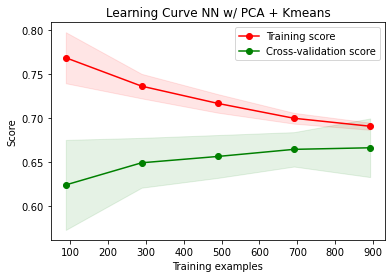

In [350]:
title = 'Learning Curve NN w/ PCA + Kmeans'
plot = plot_learning_curve(
    mlp,
    title,
    X_PCA_kmeans_train,
    y_PCA_kmeans_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

Text(0.5, 1.0, 'Loss Curve NN w/ PCA + Kmeans')

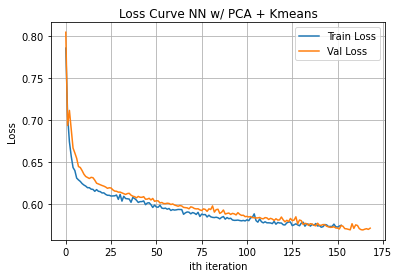

In [345]:
mlp.fit(X_PCA_kmeans_train, y_PCA_kmeans_train)
plt.plot(mlp.loss_curve_, label='Train Loss')
mlp.fit(X_PCA_kmeans_test, y_PCA_kmeans_test)
plt.plot(mlp.loss_curve_, label='Val Loss')
plt.legend()
plt.grid()
plt.xlabel('ith iteration')
plt.ylabel('Loss')
plt.title('Loss Curve NN w/ PCA + Kmeans')

## ICA

In [351]:
# nn_clustering_results = {}
X_ICA_kmeans = np.append(X_ICA, np.expand_dims(kmeans_labels['ICA'], axis=1), axis=1)
X_ICA_kmeans_train, X_ICA_kmeans_test, y_ICA_kmeans_train, y_ICA_kmeans_test = \
train_test_split(X_ICA_kmeans, y, test_size=0.3, random_state=0)

In [352]:
mlp.fit(X_ICA_kmeans_train, y_ICA_kmeans_train)
y_ICA_kmeans_pred = mlp.predict(X_ICA_kmeans_test)
metrics = get_metrics(y_ICA_kmeans_test, y_ICA_kmeans_pred)
nn_kmeans_clustering_results['ICA'] = metrics

Accuracy:  73.22% 
Precision: 72.56% 
Recall:    77.82% 
F1 Score:  75.10% 
AUC Score: 73.04% 


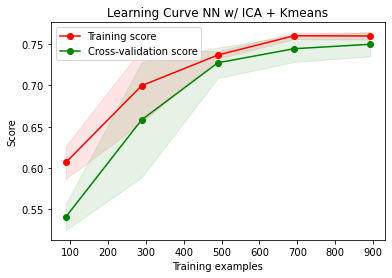

In [301]:
title = 'Learning Curve NN w/ ICA + Kmeans'
plot = plot_learning_curve(
    mlp,
    title,
    X_ICA_kmeans_train,
    y_ICA_kmeans_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

## RP

In [353]:

X_RP_kmeans = np.append(X_RP, np.expand_dims(kmeans_labels['RP'], axis=1), axis=1)
X_RP_kmeans_train, X_RP_kmeans_test, y_RP_kmeans_train, y_RP_kmeans_test = \
train_test_split(X_RP_kmeans, y, test_size=0.3, random_state=0)

In [354]:
mlp.fit(X_RP_kmeans_train, y_RP_kmeans_train)
y_RP_kmeans_pred = mlp.predict(X_RP_kmeans_test)
metrics = get_metrics(y_RP_kmeans_test, y_RP_kmeans_pred)
nn_kmeans_clustering_results['RP'] = metrics

Accuracy:  69.25% 
Precision: 67.72% 
Recall:    77.82% 
F1 Score:  72.42% 
AUC Score: 68.91% 


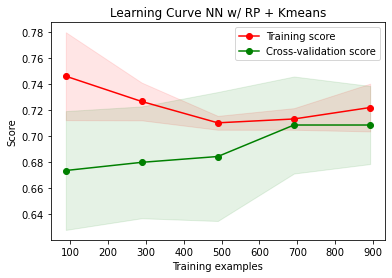

In [304]:
title = 'Learning Curve NN w/ RP + Kmeans'
plot = plot_learning_curve(
    mlp,
    title,
    X_RP_kmeans_train,
    y_RP_kmeans_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

## Tree

In [368]:
X_tree_kmeans = np.append(X_tree, np.expand_dims(kmeans_labels['Tree'], axis=1), axis=1)
X_tree_kmeans_train, X_tree_kmeans_test, y_tree_kmeans_train, y_tree_kmeans_test = \
train_test_split(X_tree_kmeans, y, test_size=0.3, random_state=0)

In [369]:
mlp.fit(X_tree_kmeans_train, y_tree_kmeans_train)
y_tree_kmeans_pred = mlp.predict(X_tree_kmeans_test)
metrics = get_metrics(y_tree_kmeans_test, y_tree_kmeans_pred)
nn_kmeans_clustering_results['Tree'] = metrics

Accuracy:  73.43% 
Precision: 73.18% 
Recall:    77.02% 
F1 Score:  75.05% 
AUC Score: 73.29% 


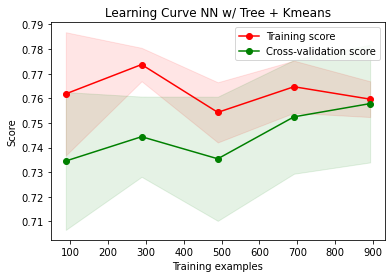

In [370]:
title = 'Learning Curve NN w/ Tree + Kmeans'
plot = plot_learning_curve(
    mlp,
    title,
    X_tree_kmeans_train,
    y_tree_kmeans_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

# NN with EM Clustering

In [357]:
nn_em_clustering_results={}

## PCA

In [358]:

X_PCA_em = np.append(X_PCA, np.expand_dims(em_labels['PCA'], axis=1), axis=1)
X_PCA_em_train, X_PCA_em_test, y_PCA_em_train, y_PCA_em_test = \
train_test_split(X_PCA_em, y, test_size=0.3, random_state=0)

In [359]:
mlp.fit(X_PCA_em_train, y_PCA_em_train)
y_PCA_em_pred = mlp.predict(X_PCA_em_test)
metrics = get_metrics(y_PCA_em_test, y_PCA_em_pred)
nn_em_clustering_results['PCA'] = metrics

Accuracy:  60.25% 
Precision: 59.54% 
Recall:    72.98% 
F1 Score:  65.58% 
AUC Score: 59.75% 


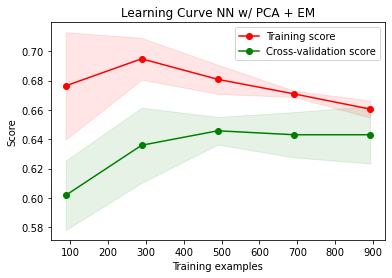

In [325]:
title = 'Learning Curve NN w/ PCA + EM'
plot = plot_learning_curve(
    mlp,
    title,
    X_PCA_em_train,
    y_PCA_em_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

## ICA

In [360]:

X_ICA_em = np.append(X_ICA, np.expand_dims(em_labels['PCA'], axis=1), axis=1)
X_ICA_em_train, X_ICA_em_test, y_ICA_em_train, y_ICA_em_test = \
train_test_split(X_ICA_em, y, test_size=0.3, random_state=0)

In [361]:
mlp.fit(X_ICA_em_train, y_ICA_em_train)
y_ICA_em_pred = mlp.predict(X_ICA_em_test)
metrics = get_metrics(y_ICA_em_test, y_ICA_em_pred)
nn_em_clustering_results['ICA'] = metrics

Accuracy:  73.22% 
Precision: 72.06% 
Recall:    79.03% 
F1 Score:  75.38% 
AUC Score: 72.99% 


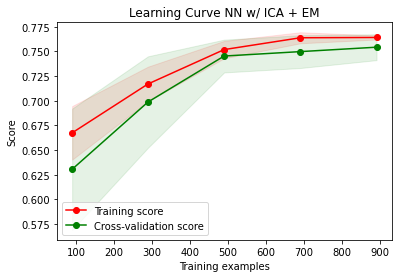

In [328]:
title = 'Learning Curve NN w/ ICA + EM'
plot = plot_learning_curve(
    mlp,
    title,
    X_ICA_em_train,
    y_ICA_em_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

## RP

In [362]:

X_RP_em = np.append(X_RP, np.expand_dims(em_labels['RP'], axis=1), axis=1)
X_RP_em_train, X_RP_em_test, y_RP_em_train, y_RP_em_test = \
train_test_split(X_RP_em, y, test_size=0.3, random_state=0)

In [363]:
mlp.fit(X_RP_em_train, y_RP_em_train)
y_RP_em_pred = mlp.predict(X_RP_em_test)
metrics = get_metrics(y_RP_em_test, y_RP_em_pred)
nn_em_clustering_results['RP'] = metrics

Accuracy:  69.87% 
Precision: 70.31% 
Recall:    72.58% 
F1 Score:  71.43% 
AUC Score: 69.77% 


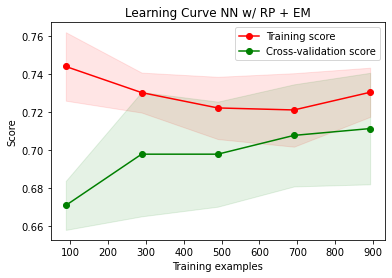

In [331]:
title = 'Learning Curve NN w/ RP + EM'
plot = plot_learning_curve(
    mlp,
    title,
    X_RP_em_train,
    y_RP_em_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

## Tree

In [364]:
X_tree_em = np.append(X_tree, np.expand_dims(em_labels['Tree'], axis=1), axis=1)
X_tree_em_train, X_tree_em_test, y_tree_em_train, y_tree_em_test = \
train_test_split(X_tree_em, y, test_size=0.3, random_state=0)

In [365]:
mlp.fit(X_tree_em_train, y_tree_em_train)
y_tree_em_pred = mlp.predict(X_tree_em_test)
metrics = get_metrics(y_tree_em_test, y_tree_em_pred)
nn_em_clustering_results['Tree'] = metrics

Accuracy:  74.06% 
Precision: 73.85% 
Recall:    77.42% 
F1 Score:  75.59% 
AUC Score: 73.93% 


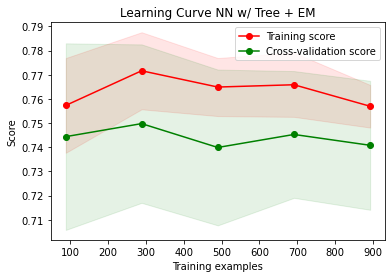

In [334]:
title = 'Learning Curve NN w/ Tree + EM'
plot = plot_learning_curve(
    mlp,
    title,
    X_tree_em_train,
    y_tree_em_train,
    axes=None,
    ylim=None,
    cv=KFold(n_splits=5, shuffle=True),
    n_jobs=None,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
)
plt.grid()
plt.title(title)
plot.show()

In [339]:
pd.DataFrame(results).T.sort_values(['Accuracy', 'AUC Score'], ascending=[False, False])

,Accuracy,Precision,Recall,F1 Score,AUC Score
Tree,0.736402,0.742063,0.754032,0.748000,0.735712
ICA,0.736402,0.727612,0.786290,0.755814,0.734450
RP,0.694561,0.686131,0.758065,0.720307,0.692076
PCA,0.596234,0.589577,0.729839,0.652252,0.591006


In [371]:
pd.DataFrame(nn_kmeans_clustering_results).T.sort_values(['Accuracy', 'AUC Score'], ascending=[False, False])

,Accuracy,Precision,Recall,F1 Score,AUC Score
Tree,0.734310,0.731801,0.770161,0.750491,0.732907
ICA,0.732218,0.725564,0.778226,0.750973,0.730417
RP,0.692469,0.677193,0.778226,0.724203,0.689113
PCA,0.656904,0.672131,0.661290,0.666667,0.656732


In [366]:
pd.DataFrame(nn_em_clustering_results).T.sort_values(['Accuracy', 'AUC Score'], ascending=[False, False])

,Accuracy,Precision,Recall,F1 Score,AUC Score
Tree,0.740586,0.738462,0.774194,0.755906,0.739271
ICA,0.732218,0.720588,0.790323,0.753846,0.729944
RP,0.698745,0.703125,0.725806,0.714286,0.697686
PCA,0.602510,0.595395,0.729839,0.655797,0.597528
